In [24]:

from BenchmarkProblems.ToyAmalgam import ToyAmalgam
from BenchmarkProblems.GraphColouring import GraphColouring
from BenchmarkProblems.Checkerboard import CheckerBoard
from BenchmarkProblems.Trapk import Trapk
from BenchmarkProblems.RoyalRoad import RoyalRoad
from Core.PS import PS
from Core.get_pRef import get_pRef_from_metaheuristic

problem = ToyAmalgam(toy_problems="PORTX", clique_size=5)

pRef = get_pRef_from_metaheuristic(problem=problem,
                                   sample_size=10000,
                                   which_algorithm="GA",
                                   unique=True)

best_solution = pRef.get_best_solution()

print(f"The best solution is \n{problem.repr_ps(PS.from_FS(best_solution))}")

del pRef

The best solution is 
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [26]:


from Core.PS import PS
from Core.PSMetric.Linkage.TraditionalPerturbationLinkage import TraditionalPerturbationLinkage
from SimplifiedSystem.ps_search_utils import run_pymoo_algorithm_with_checks
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.crossover.sbx import SimulatedBinaryCrossover
from SimplifiedSystem.Operators.Sampling import LocalPSGeometricSampling
from SimplifiedSystem.LocalPSSearchTask import LocalPSSearchTask


def explain_solution(to_explain, budget):
    atomicity_metric = TraditionalPerturbationLinkage(problem)
    atomicity_metric.set_solution(to_explain)

    
    def atomicity(ps):
        if ps.fixed_count() == 1:
            return float(0)
        return -atomicity_metric.get_atomicity(ps)
    
    
    def dependence(ps):
        return atomicity_metric.get_dependence(ps)

    objectives = [atomicity, dependence]
    population_size = 100
    
    ga_problem = LocalPSSearchTask(solution_to_explain=to_explain,
                                    objectives=objectives,
                                    # unexplained_mask=None,
                                    proportion_unexplained_that_needs_used=0.01,
                                    proportion_used_that_should_be_unexplained=0.01)
    
    # if there are no operators given, we have these defaults
    sampling_operator = LocalPSGeometricSampling()
    crossover_operator = SimulatedBinaryCrossover(prob=0.3)
    mutation_operator = BitflipMutation(prob=1 / ga_problem.n_var)
    
    # the next line of code is a bit odd, but it works! It uses a GA if there is one objective
    algorithm = (GA if len(objectives) < 2 else NSGA2)(pop_size=population_size,
                                                       sampling=sampling_operator,
                                                       crossover=crossover_operator,
                                                       mutation=mutation_operator,
                                                       eliminate_duplicates=True)
    
    pss = run_pymoo_algorithm_with_checks(pymoo_problem=ga_problem,
                                          algorithm=algorithm,
                                          reattempts_when_fail=5,
                                          ps_budget = budget,
                                          verbose=True)
    
    return pss
    
    
pss = explain_solution(best_solution, budget=10000)
for ps in pss:
    print(problem.repr_ps(ps))
    print()
    
    


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       62 |     10 |  0.000000E+00 |  0.0080645161 |             - |             -
     2 |      162 |     14 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     3 |      262 |     21 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     4 |      362 |     37 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     5 |      462 |     63 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     6 |      562 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     7 |      662 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      762 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      862 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    10 |      962 |    100 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

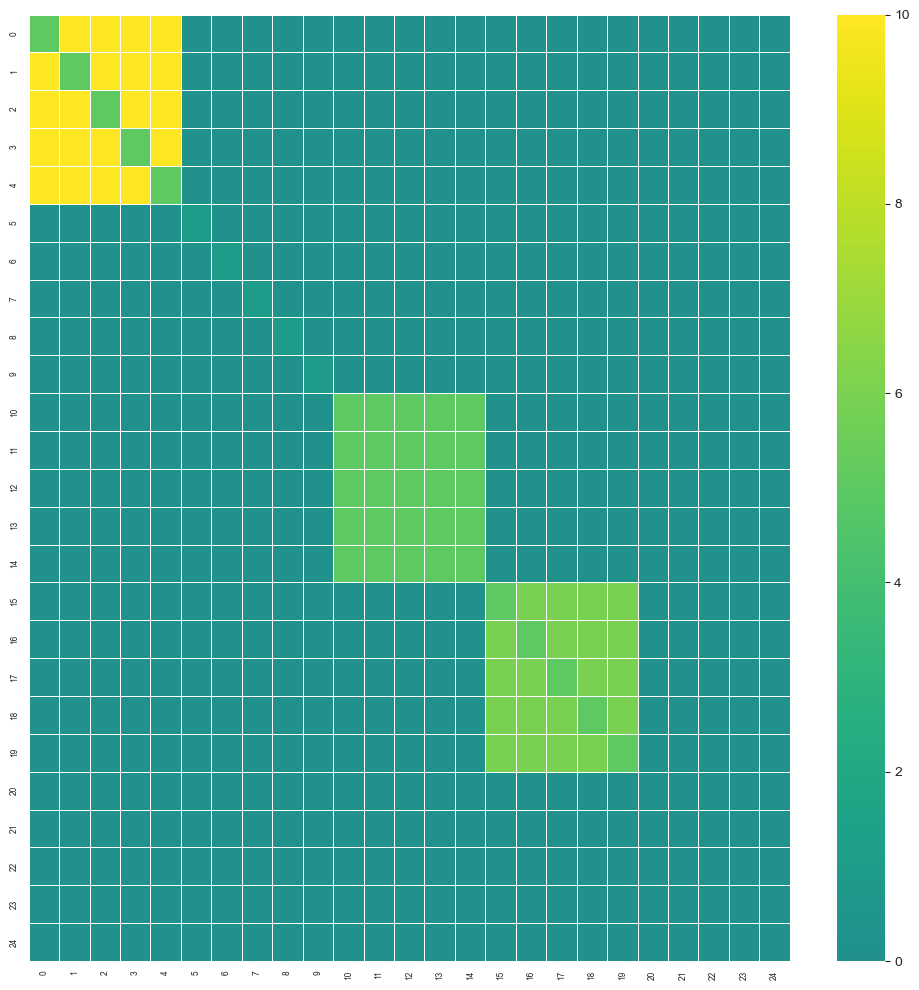

In [25]:
import utils

atomicity_metric = TraditionalPerturbationLinkage(problem)
atomicity_metric.set_solution(best_solution)

utils.show_matrix_with_colours(atomicity_metric.linkage_table)

In [20]:
problem.connections

[(0, 5),
 (0, 8),
 (1, 5),
 (1, 9),
 (1, 11),
 (2, 4),
 (2, 11),
 (3, 6),
 (3, 10),
 (4, 9),
 (4, 10),
 (5, 9),
 (5, 11),
 (10, 11)]

In [ ]:
# linkage from examples